In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
data=pd.read_csv('heart.csv')
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [3]:
x=data.iloc[:,:-1].values
y=data.iloc[:, -1].values

In [4]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.25)

In [5]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

### Logistic Regression

In [6]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(random_state=0)
lr.fit(x_train,y_train)

LogisticRegression(random_state=0)

In [7]:
y_pred_lr=lr.predict(x_test)

In [8]:
from sklearn.metrics import confusion_matrix
cm_lr=confusion_matrix(y_test,y_pred_lr)
cm_lr

array([[44,  4],
       [13, 14]], dtype=int64)

In [9]:
from sklearn.metrics import accuracy_score
ac_lr=accuracy_score(y_test,y_pred_lr)
ac_lr

0.7733333333333333

### KNN

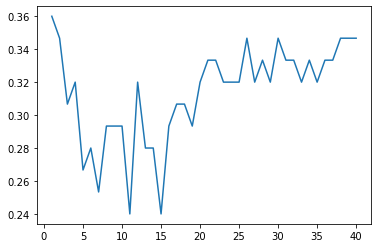

In [10]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
elbow=[]
for i in range (1,41):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    y_pred_knn=knn.predict(x_test)
    elbow.append(np.mean(y_test!=y_pred_knn))
plt.plot(range(1,41),elbow)

In [11]:
knn=KNeighborsClassifier(n_neighbors=11)
knn.fit(x_train,y_train)
y_pred_knn_after=knn.predict(x_test)
cm_knn=confusion_matrix(y_test,y_pred_knn_after)
cm_knn

array([[47,  1],
       [17, 10]], dtype=int64)

In [12]:
ac_knn=accuracy_score(y_test,y_pred_knn_after)
ac_knn

0.76

### Naive Bayes


In [13]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(x_train,y_train)

GaussianNB()

In [14]:
y_pred_nb=nb.predict(x_test)
cm_nb=confusion_matrix(y_test,y_pred_nb)
cm_nb

array([[42,  6],
       [19,  8]], dtype=int64)

In [15]:
ac_nb=accuracy_score(y_test,y_pred_nb)
ac_nb

0.6666666666666666

### Support Vector Classification


In [16]:
from sklearn.svm import SVC
svc=SVC(kernel='linear',random_state=0)
svc.fit(x_train,y_train)

SVC(kernel='linear', random_state=0)

In [17]:
y_pred_svc=svc.predict(x_test)
cm_svc=confusion_matrix(y_test,y_pred_svc)
cm_svc

array([[45,  3],
       [13, 14]], dtype=int64)

In [18]:
ac_svc=accuracy_score(y_test,y_pred_svc)
ac_svc

0.7866666666666666

### Decision Tree Classification

In [19]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier(criterion='entropy',random_state=0)
dtc.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [20]:
y_pred_dtc=dtc.predict(x_test)
cm_dtc=confusion_matrix(y_test,y_pred_dtc)
cm_dtc

array([[40,  8],
       [ 6, 21]], dtype=int64)

In [21]:
ac_dtc=accuracy_score(y_test,y_pred_dtc)
ac_dtc

0.8133333333333334

### Random Forest Classification 


In [22]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(criterion='entropy',n_estimators=15,random_state=0)
rfc.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=15, random_state=0)

In [23]:
y_pred_rfc=rfc.predict(x_test)
cm_rfc=confusion_matrix(y_test,y_pred_rfc)
cm_rfc

array([[46,  2],
       [ 7, 20]], dtype=int64)

In [24]:
ac_rfc=accuracy_score(y_test,y_pred_rfc)
ac_rfc

0.88

# To find which algorithm is most accurate ?


In [25]:
algorithms=['Logistic Regression ','K-Nearest Neighbor(KNN)','Naive Bayes',
            'Support Vector Classification','Decision Tree Classification','Random Forest Classification']
accuracyscore=[ac_lr*100,ac_knn*100,ac_nb*100,ac_svc*100,ac_dtc*100,ac_rfc*100]

In [26]:
overall=pd.DataFrame({'Algorithm' :algorithms,'Accuracy Score (in percent)':accuracyscore})
overall

,Algorithm,Accuracy Score (in percent)
0,Logistic Regression,77.333333
1,K-Nearest Neighbor(KNN),76.000000
2,Naive Bayes,66.666667
3,Support Vector Classification,78.666667
4,Decision Tree Classification,81.333333
5,Random Forest Classification,88.000000


Text(0.5, 1.0, 'Accuracy Score of each algorithm')

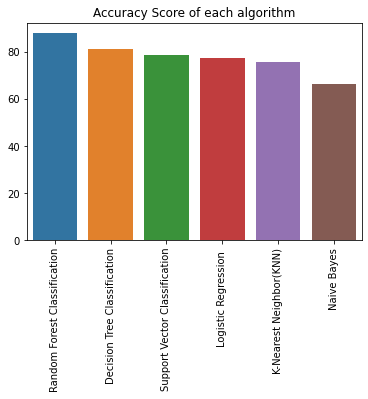

In [27]:
overall_sort=overall.sort_values(['Accuracy Score (in percent)'],ascending=False)
sns.barplot(x=overall_sort['Algorithm'].values,y=overall_sort['Accuracy Score (in percent)'].values)
plt.xticks(rotation='vertical')
plt.title('Accuracy Score of each algorithm')

#### We can see that Random Forest Classification(with n_estimators=15) is 88 percent with 25 percent size.

# Thank You !!